In [ ]:
import re
import tweepy
import pandas as pd
from tweepy import OAuthHandler
from textblob import TextBlob
import numpy as np
import matplotlib
import configparser

In [ ]:
first_day= pd.read_csv('/content/tweets_mon.csv')  #date- 23/01/22


In [ ]:
first_day=pd.DataFrame(first_day)


first_day

,day,Date,Tweet,Id
0,29,29-04-2022 23:17,b'Morning Updates: 30/April/2022\n#Nifty #SGXN...,b'makemeinvestor'
1,29,29-04-2022 19:30,b'#Nifty extends decline to 3 weeks in a row t...,b'FighterAKR'
2,29,29-04-2022 18:32,"b""Don't trade in quiet, dull markets. Dow, Liv...",b'WhoIsKamalSingh'
3,29,29-04-2022 18:30,"b'When in doubt, get out! If the market goes d...",b'WhoIsKamalSingh'
4,29,29-04-2022 18:27,b'#us100 #nasdaq #rsistudy #eurusd #forex #gol...,b'Vinodrt'
...,...,...,...,...
2191,22,22-04-2022 13:18,b'Must watch our weekly market analysis video ...,b'binitabharti91'
2192,22,22-04-2022 13:15,b'#Sensex tumbles over 714 points on weak glob...,b'ZeeNewsEnglish'
2193,22,22-04-2022 13:14,b'#Vinatiorganic breakout retest and buyers ba...,b'Prgupta1506'
2194,22,22-04-2022 13:08,"b""High followers stock are traded heavily and ...",b'stock4me1'


In [ ]:
keep_col=['Tweet','day']
df_1=first_day[keep_col]
df_1

,Tweet,day
0,b'Morning Updates: 30/April/2022\n#Nifty #SGXN...,29
1,b'#Nifty extends decline to 3 weeks in a row t...,29
2,"b""Don't trade in quiet, dull markets. Dow, Liv...",29
3,"b'When in doubt, get out! If the market goes d...",29
4,b'#us100 #nasdaq #rsistudy #eurusd #forex #gol...,29
...,...,...
2191,b'Must watch our weekly market analysis video ...,22
2192,b'#Sensex tumbles over 714 points on weak glob...,22
2193,b'#Vinatiorganic breakout retest and buyers ba...,22
2194,"b""High followers stock are traded heavily and ...",22


In [ ]:
def cleanup(text):
    temp = text.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp=re.sub(r'RT : ','',temp)
    return temp

In [ ]:
df_1['Tweet']=df_1['Tweet'].apply(cleanup)

df_1['Tweet']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       bmorning updates  30 april 2022 n     nglobal ...
1       b extends decline to 3 weeks in a row to close...
2       b dont trade in quiet  dull markets  dow  live...
3       bwhen in doubt  get out  if the market goes du...
4       b         9800 now seems probable wth weekly c...
                              ...                        
2191    bmust watch our weekly market analysis video a...
2192    b tumbles over 714 points on weak global trend...
2193    b breakout retest and buyers back again    loo...
2194    b high followers stock are traded heavily and ...
2195    bbut this sugar for petrol energy n nhave you ...
Name: Tweet, Length: 2196, dtype: object

In [ ]:
def getTextSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def getTextPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df_1['subjectivity']=df_1['Tweet'].apply(getTextSubjectivity)
df_1['polarity']=df_1['Tweet'].apply(getTextPolarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1.head()

,Tweet,day,subjectivity,polarity
0,bmorning updates 30 april 2022 n nglobal ...,29,0.000000,0.000000
1,b extends decline to 3 weeks in a row to close...,29,0.100000,0.000000
2,b dont trade in quiet dull markets dow live...,29,0.416667,-0.145833
3,bwhen in doubt get out if the market goes du...,29,0.416667,-0.145833
4,b 9800 now seems probable wth weekly c...,29,0.000000,0.000000


In [ ]:
def getSentiment(a):
  if a<0:
    return 'Negative'
  elif a==0:
    return "Neutral"
  else :
    return "Positive"
# s = "Thank you"
# A = cleanup(s)
# Val = getTextSubjectivity(A)
# Polar= getTextPolarity(A)
# Val

In [ ]:
df_1['Score']=df_1['polarity'].apply(getSentiment)


In [ ]:
df_1

,Tweet,day,subjectivity,polarity,Score
0,bmorning updates 30 april 2022 n nglobal ...,29,0.000000,0.000000,Neutral
1,b extends decline to 3 weeks in a row to close...,29,0.100000,0.000000,Neutral
2,b dont trade in quiet dull markets dow live...,29,0.416667,-0.145833,Negative
3,bwhen in doubt get out if the market goes du...,29,0.416667,-0.145833,Negative
4,b 9800 now seems probable wth weekly c...,29,0.000000,0.000000,Neutral
...,...,...,...,...,...
2191,bmust watch our weekly market analysis video a...,22,0.500000,0.200000,Positive
2192,b tumbles over 714 points on weak global trend...,22,0.312500,-0.187500,Negative
2193,b breakout retest and buyers back again loo...,22,0.300000,0.350000,Positive
2194,b high followers stock are traded heavily and ...,22,0.465714,-0.013333,Negative


In [ ]:
positive=df_1[df_1['Score']=="Positive"]
print(str(positive.shape[0]/(df_1.shape[0])*100)+"% of positive tweets in Day 1")
pos_1=(positive.shape[0]/(df_1.shape[0])*100)




28.324225865209474% of positive tweets in Day 1


In [ ]:
negative=df_1[df_1['Score']=="Negative"]
print(str(negative.shape[0]/(df_1.shape[0])*100)+"% of negative tweets in Day 1")
neg_1=(negative.shape[0]/(df_1.shape[0])*100)


15.391621129326047% of negative tweets in Day 1


In [ ]:
neutral=df_1[df_1['Score']=="Neutral"]
print(str(neutral.shape[0]/(df_1.shape[0])*100)+"% of neutral tweets in Day 1")
neu_1=(neutral.shape[0]/(df_1.shape[0])*100)


56.284153005464475% of neutral tweets in Day 1


In [ ]:
for i in df_1.index:
  if (df_1['Score'][i])=='Neutral':
    df_1.drop(i, inplace=True)



In [ ]:
df_1


,Tweet,day,subjectivity,polarity,Score
2,b dont trade in quiet dull markets dow live...,29,0.416667,-0.145833,Negative
3,bwhen in doubt get out if the market goes du...,29,0.416667,-0.145833,Negative
5,bstay in one time frame yes it is important ...,29,0.450000,0.216667,Positive
6,b pd has failed n almost 400 points ga...,29,0.300000,-0.500000,Negative
12,bas anticipated on our private telegram channe...,29,0.317593,-0.103704,Negative
...,...,...,...,...,...
2191,bmust watch our weekly market analysis video a...,22,0.500000,0.200000,Positive
2192,b tumbles over 714 points on weak global trend...,22,0.312500,-0.187500,Negative
2193,b breakout retest and buyers back again loo...,22,0.300000,0.350000,Positive
2194,b high followers stock are traded heavily and ...,22,0.465714,-0.013333,Negative


In [ ]:
list_polarity=[]

for i in df_1.index:
  if (df_1['day'][i])==29:
    count_1=0
    count_1+=1
    polarity=0
    polarity+=(df_1['polarity'][i])
    Net_polar_29=polarity/count_1
  # print(Net_polar)
  if (df_1['day'][i])==28:
    count_2=0
    count_2+=1
    polarity=0
    polarity+=(df_1['polarity'][i])
    Net_polar_28=polarity/count_2
  # print(Net_polar)
  if (df_1['day'][i])==27:
    count_3=0
    count_3+=1
    polarity=0
    polarity+=(df_1['polarity'][i])
    Net_polar_27=polarity/count_3
  # print(Net_polar)
  if (df_1['day'][i])==26:
    count_4=0
    count_4+=1
    polarity=0
    polarity+=(df_1['polarity'][i])
    Net_polar_26=polarity/count_4
  # print(Net_polar)
  if (df_1['day'][i])==25:
    count_5=0
    count_5+=1
    polarity_25=0
    polarity_25+=(df_1['polarity'][i])
    Net_polar_25=polarity_25/count_5
  # print(Net_polar)
  if (df_1['day'][i])==24:
    count_24=0
    count_24+=1
    polarity_24=0
    polarity_24+=(df_1['polarity'][i])
    Net_polar_24=polarity_24/count_24
  # print(Net_polar)
  if (df_1['day'][i])==23:
    count_23=0
    count_23+=1
    polarity_23=0
    polarity_23+=(df_1['polarity'][i])
    Net_polar_23=polarity_23/count_23
  # print(Net_polar)
  if (df_1['day'][i])==22:
    count_22=0
    count_22+=1
    polarity_22=0
    polarity_22+=(df_1['polarity'][i])
    Net_polar_22=polarity_22/count_22
list_polarity.append(Net_polar_22)
list_polarity.append(Net_polar_23)
list_polarity.append(Net_polar_24)
list_polarity.append(Net_polar_25)
list_polarity.append(Net_polar_26)
list_polarity.append(Net_polar_27)
list_polarity.append(Net_polar_28)
list_polarity.append(Net_polar_29)
#len(list_polarity)

In [ ]:
list_polarity

[0.4,
 0.14285714285714285,
 0.2722222222222222,
 0.1,
 0.35,
 0.22499999999999998,
 0.11499999999999999,
 0.04166666666666667]

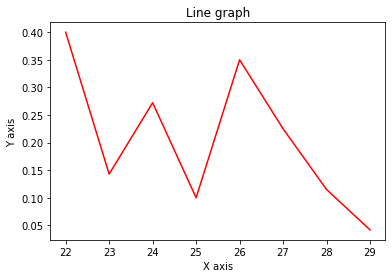

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data to be plotted
y= np.array(list_polarity)
x= [22,23,24,25,26,27,28,29]
 
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show() 


In [ ]:
#coming to stocks values--

Stock_data= pd.read_csv('/content/Stocks_sensex - Sheet1.csv')  
Stock_data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Factor
0,22-04-2022,57531.95,57689.86,57134.72,57197.15,57197.15,7600,-4583.500
1,23-04-2022,57531.95,57689.86,57134.72,57197.15,57197.15,7600,-4583.500
2,24-04-2022,57531.95,57689.86,57134.72,57197.15,57197.15,7600,-4583.500
3,25-04-2022,56757.64,56875.65,56356.87,56579.89,56579.89,7000,-2398.430
4,26-04-2022,57066.24,57442.24,56904.51,57356.61,57356.61,7300,3941.983


# What is Factor here?

We calculated a single value for representing the stock price fluctuations which can consider both the opening and closing price of the market.

Our used formula - 
     
     Factor = (Closing Price - Opening Price*Volume/(High of the day - low of the day)

In [ ]:
from sklearn import preprocessing
X_data= Stock_data['Factor']
standard = preprocessing.scale(X_data)
print(standard)


[-0.6225022  -0.6225022  -0.6225022   0.07509179  2.09929878  0.14145527
  0.84920479 -1.29754403]


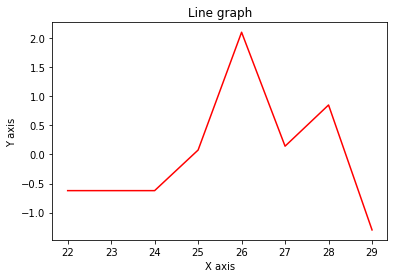

In [ ]:
#This Value indicates the change in the stock prices that we will use to read the sentimental affect of twitter on them.


y= np.array(standard)
x= [22,23,24,25,26,27,28,29]
 
# plotting the stock's change factor.
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show() 


The major problem with this is of dataset, we can only get tweets of seven days from twitter on a particular hashtags and keywords that's why we can only illustrate how it will done but the problem of exact prediction can't be done properly.

In [ ]:
#Now we have sentiments and the stocks factor as a testing data , that we could use for prediction , once we have larger data, atleas for an year.
maindata= pd.read_csv('/content/Maindata - Sheet1.csv') 
maindata=pd.DataFrame(maindata)

x=maindata['Factor']
y=maindata['Sentiments']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y)

X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)


In [ ]:
x

0   -0.622502
1   -0.622502
2   -0.622502
3    0.075092
4    2.099299
5    0.141455
6    0.849205
7   -1.297544
Name: Factor, dtype: float64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
pipe= LinearRegression()
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score -0.3741716601546934
MAE 0.06468253964999998


In [ ]:
pipe=  RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 score -0.086075640183642
MAE 0.06468253964999998


In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

pipe= VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])


pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score -1.4586069988531332
MAE 0.07811891630486323


In [ ]:
import pickle

pickle.dump(maindata,open('maindata.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas

# import the model
pipe = pandas.read_pickle(open('pipe.pkl','rb'))
df = pandas.read_pickle(open('data.pkl','rb'))

st.title("Stock Market forecasting")

# weight
Sentiments= st.number_input('Weight of the Laptop')


query = np.array([Sentiments])

query = query.reshape(1,12)
st.title("The predicted price for the stock is:  " + str(int(np.exp(pipe.predict(query)[0]))))

ModuleNotFoundError: ignored